In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [157]:

# Loading the image and converting it to greyscale
image_path = "dog.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image_data = original_image
n, m = image_data.shape
n, m

(2000, 1500)

In [98]:
# Computing 2D FFT on the image
def compute_2Dfft(image_data):
    row_fft = []
    col_fft = []

    for i in range (n):
        row_fft.append(np.fft.fft(image_data[i]))
    row_fft = np.array(row_fft)
    row_fft.shape

    for j in range(m):
        col_fft.append(np.fft.fft(row_fft[:,j]))
    fft2D = np.array(col_fft).T
    return fft2D

fft2D = compute_2Dfft(image_data)

###### The code above is similar to using numpy.fft.fft2(image_data)

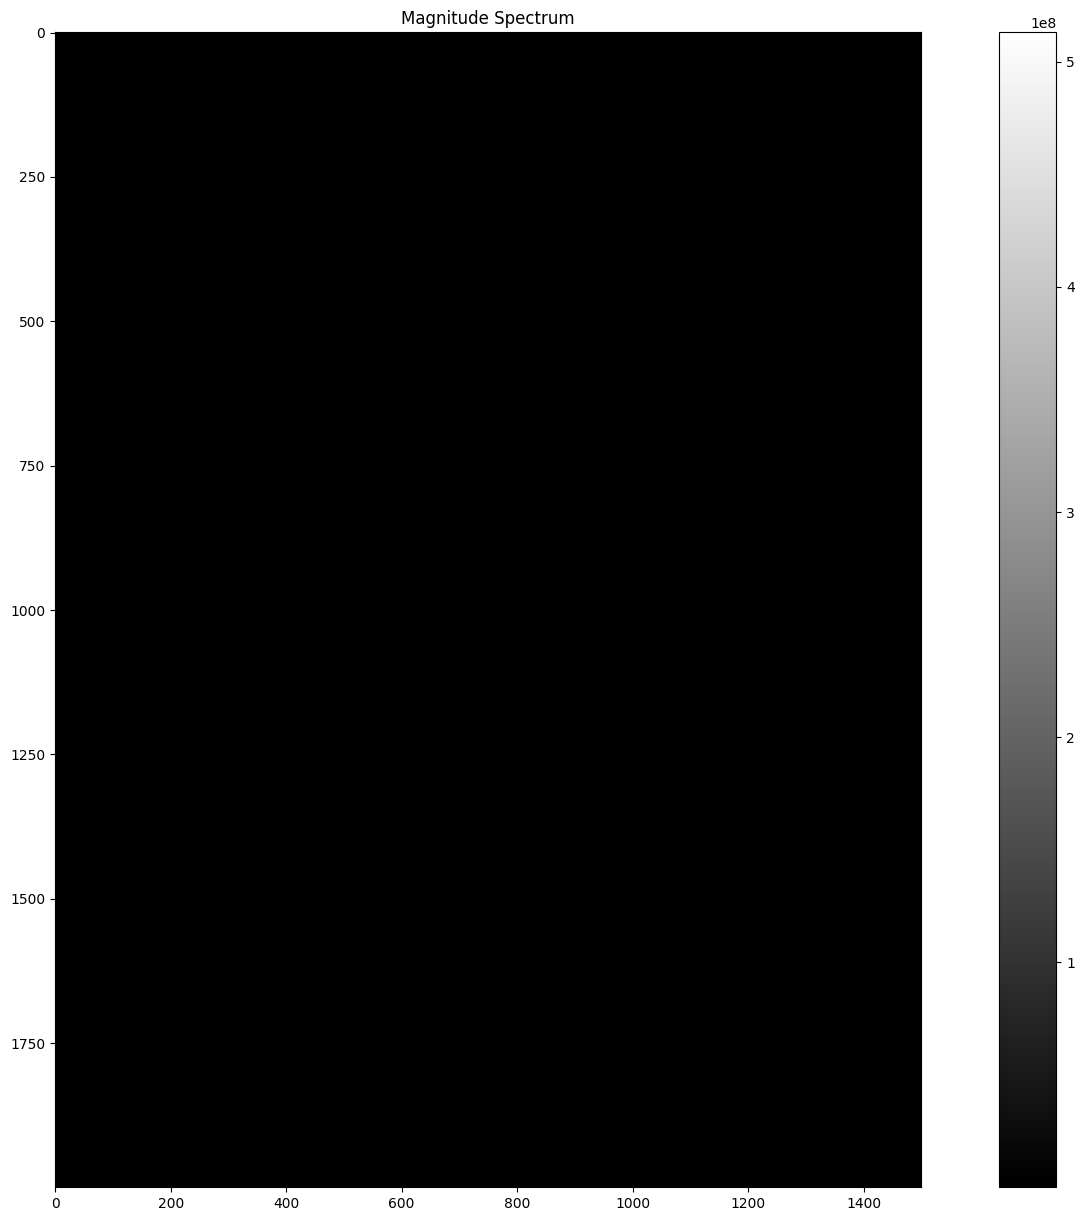

In [99]:
# Visualizing the frequency spectrum
magnitude_spectrum = abs(fft2D)
plt.figure(figsize = (20,15))
plt.imshow(magnitude_spectrum, cmap='grey')
plt.title("Magnitude Spectrum")
plt.colorbar()
plt.show()

In [133]:
def compare_image(original, compressed):
    # Comparing the original and compressed image
    plt.figure(figsize=(20, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(compressed, cmap="gray")
    plt.title("Compressed Image")
    plt.axis("off")

    plt.show()


def compress_image(image_data, percentage, f = True):

    #Computing 2DFFT on the image data
    compute_2Dfft(image_data)
    magnitude_spectrum = abs(fft2D)

    # Sorting the fourier coefficients
    sorted_magnitudes = np.sort(magnitude_spectrum.ravel())[::-1]
    threshold_index = int(percentage/100 * len(sorted_magnitudes))

    # Retriving the thershold value and filtering out the lower fourier values
    threshold_value = sorted_magnitudes[threshold_index]
    compressed_fft = fft2D * (magnitude_spectrum >= threshold_value)

    # Reconstruction using inverse FFT2 function
    compressed_image = np.fft.ifft2(compressed_fft).real
    if f == True:
        compare_image(image_data, compressed_image)
    return compressed_image

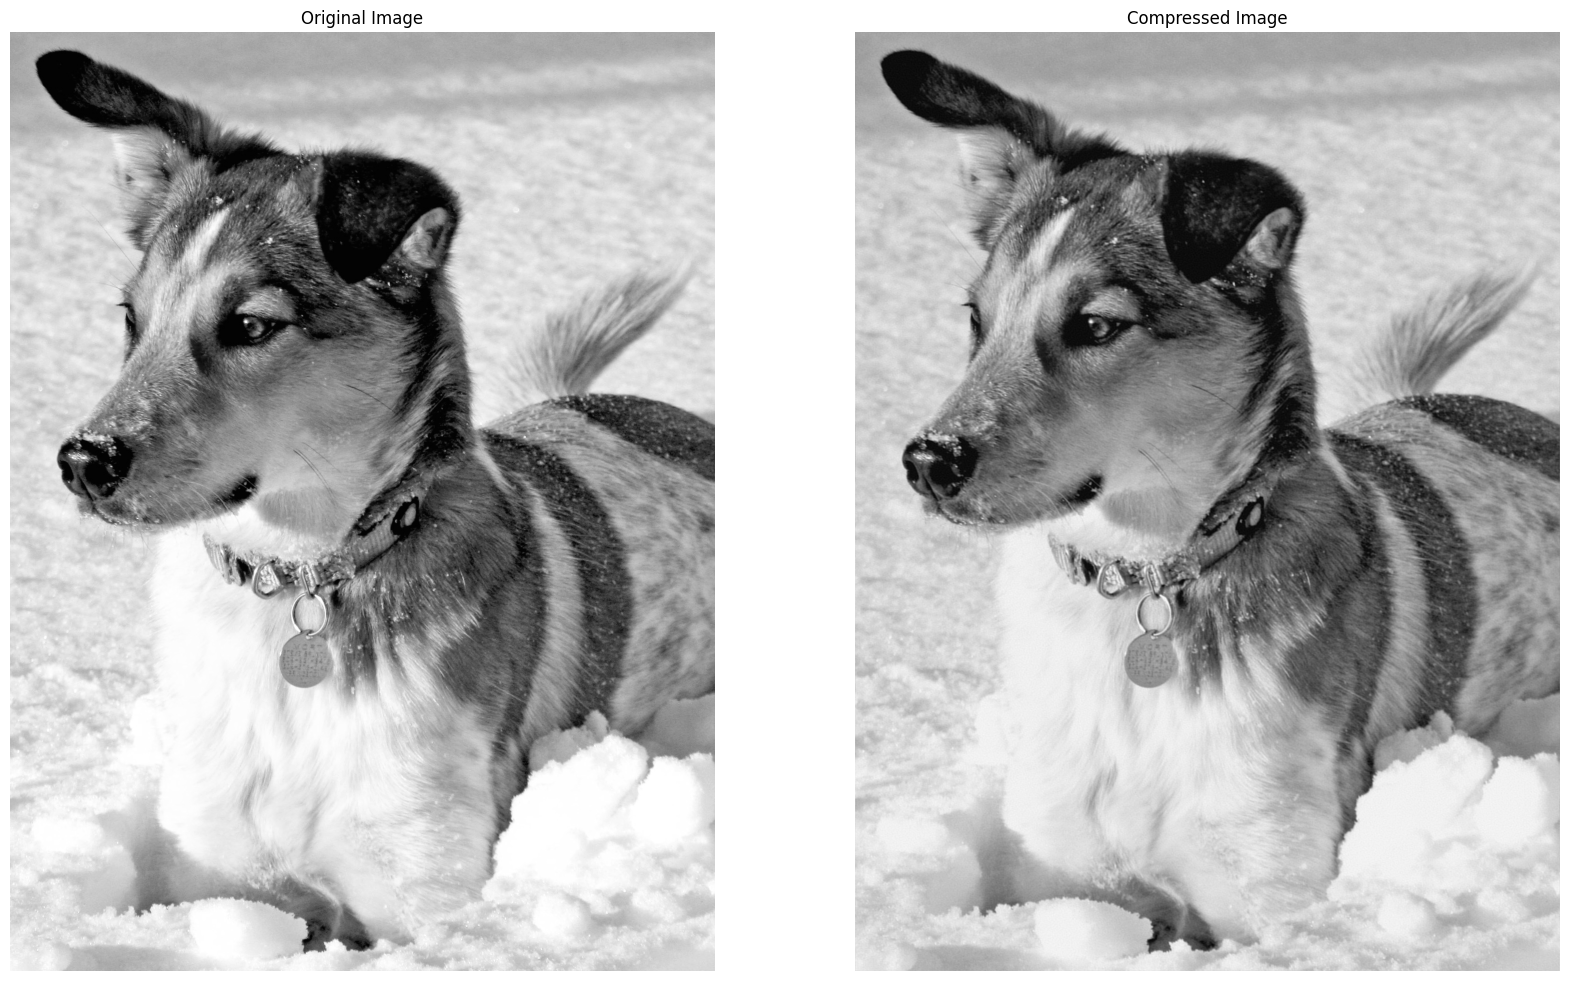

In [150]:
compressed_image_10 = compress_image(image_data, 10)

In [182]:
###### Answer to part (b)

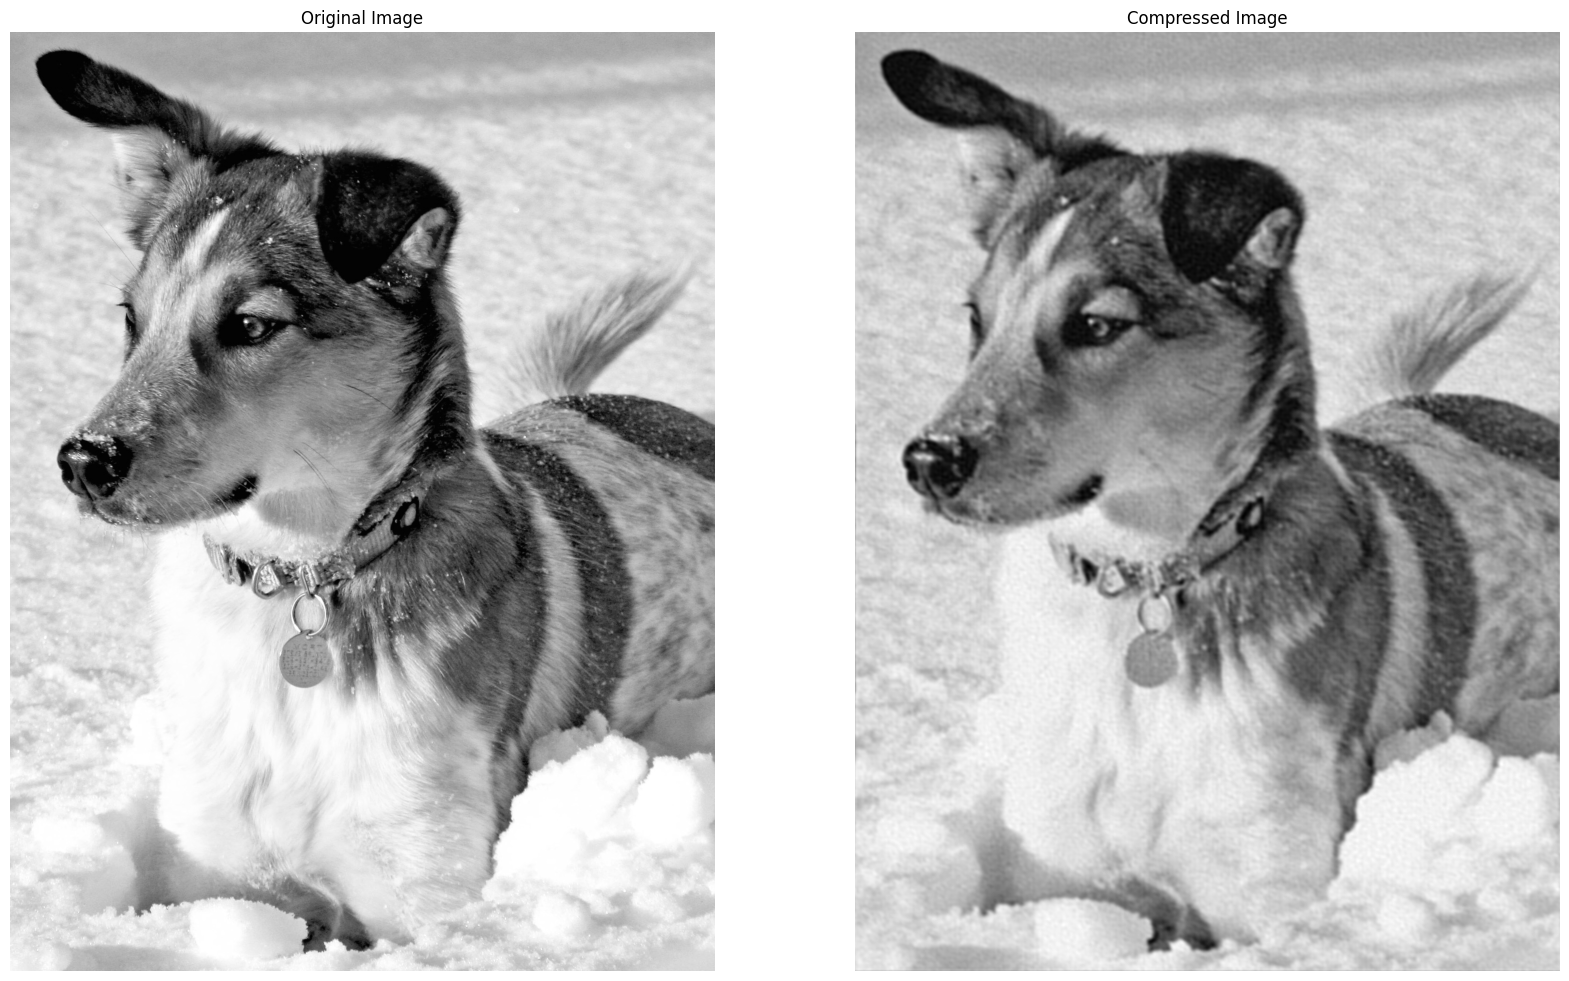

In [151]:
compressed_image_1 = compress_image(image_data, 1)

In [171]:
# Computing the L2 norm of the error between original and reconstructed image
def compute_L2_error(image1, image2):
    l2_norm = np.linalg.norm(image1 - image2)
    return l2_norm

In [175]:
print(f"The L2 Norm of the new compressed image and the original image is {compute_L2_error(original_image, compress_image(image_data, 10, False)) :.2f}.")

The L2 Norm of the new compressed image and the original image is 6224.17.


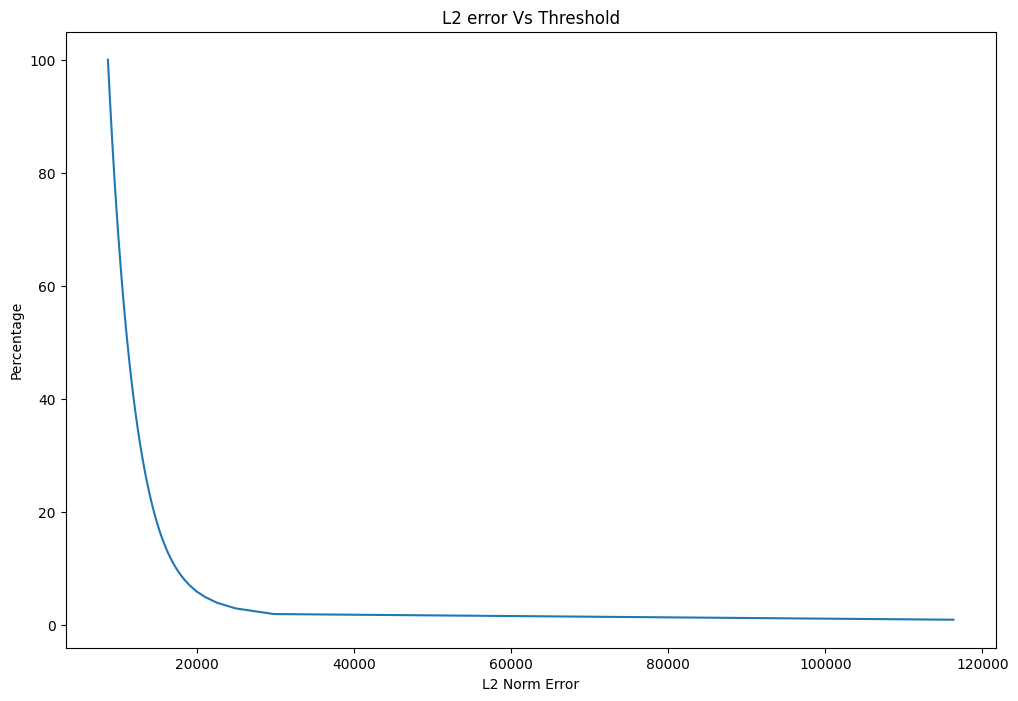

In [192]:
l2_errors = []
percentage = np.arange(100) + 1

for i in range(100):
    l2_errors.append(compute_L2_error(original_image, compress_image(image_data, (i*5)/100, False)))



plt.figure(figsize=(12, 8))
plt.title("L2 error Vs Threshold")
plt.plot(percentage, l2_errors)
plt.ylabel("L2 Norm Error")
plt.xlabel("Percentage")
plt.show()
